In [37]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:

#train_dataset 可以線性分割

train_dataset = np.array([
((1, -2, 2), -1),
((1, -1, 2), -1),
((1, -1, 0), -1),
((1, 2, 0), 1),
((1, 1, 1), 1)])

test_dataset = np.array([
((1, 1/2, 2), 1),
((1, 1/4, 1), 1),
((1, 1/2, 0), 1),
((1, -1/2, 1), -1)])


<ipython-input-38-7b3fa19fb475>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  train_dataset = np.array([
<ipython-input-38-7b3fa19fb475>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  test_dataset = np.array([


In [39]:
#判斷有沒有分類錯誤，並列印錯誤率

def check_error(w, train_dataset):
    result = None
    error = 0
    for x, s in dataset:
        x = np.array(x)
        if int(np.sign(w.T.dot(x))) != s:
            result =  x, s
            error += 1
    print("error %s/%s" % (error, len(dataset)))
    return result


In [40]:
#PLA演算法實作
def pla(train_dataset):
    w = np.zeros(3)
    while check_error(w, dataset) is not None:
        x, s = check_error(w, dataset)
        w += s * x
    return w


error 5/5
error 5/5
error 3/5
error 3/5
error 1/5
error 1/5
error 0/5


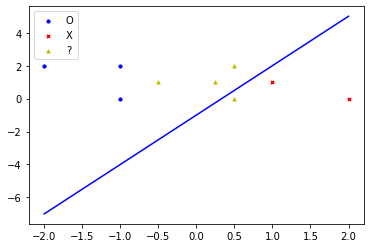

In [47]:
#執行
w = pla(train_dataset)

#畫圖
ps = [v[0] for v in train_dataset]
ts = [n[0] for n in test_dataset]
fig = plt.figure()
ax1 = fig.add_subplot(111)
#dataset前半後半已經分割好 直接畫就是

ax1.scatter([v[1] for v in ps[:3]], [v[2] for v in ps[:3]], s=10, c='b', marker="o", label='O')
ax1.scatter([v[1] for v in ps[3:]], [v[2] for v in ps[3:]], s=10, c='r', marker="x", label='X')
ax1.scatter([n[1] for n in ts[:4]], [n[2] for n in ts[:4]], s=10, c='y', marker="^", label='?')
l = np.linspace(-2,2)
a,b = -w[1]/w[2], -w[0]/w[2]
ax1.plot(l, a*l + b, 'b-')
plt.legend(loc='upper left');
plt.show()